# SML 310 - Project 1 - Linear Regression

Pranav Avva

In [295]:
import numpy as np
import numpy.random as npr
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

%matplotlib inline
sns.set_theme()

## Problem 1 - Probability and Linear Regression

### Part A

**Please explain what it means to perform a linear regression on a collection of pairs $\{ \left( x^{(i)}, y^{(i)} \right) \}$ with $1 \leq i \leq n$, drawn from two random variables $X$ and $Y$? What does this produce? How do we understand it? And what does this tell us about the underlying relationship between $X$ and $Y$?**

### Part B

**Please generate a set of 100 data points $\{ \left( x^{(i)}, y^{(i)} \right) \}$ where $X$ is distributed according to the Gaussian distribution $N(0,1)$, and $Y=X^2$, and another set where $X$ is distributed according to the uniform distribution on $[0,1]$, and $Y = X^2$. Find the linear regression lines for each, and explain why it’s reasonable that they are the same/different.**

In [296]:
data1_x = npr.normal(0, 1, 100)
data1_y = data1_x ** 2
data1 = pd.DataFrame({"x": data1_x, "y": data1_y})
del data1_x, data1_y

data2_x = npr.uniform(0, 1, 100)
data2_y = data2_x ** 2
data2 = pd.DataFrame({"x": data2_x, "y": data2_y})
del data2_x, data2_y

In [297]:
print(data1.head())
print()
print(data2.head())

          x         y
0  0.341244  0.116447
1 -0.866884  0.751487
2 -0.090463  0.008184
3 -1.330270  1.769617
4 -0.286404  0.082027

          x         y
0  0.620263  0.384727
1  0.498950  0.248952
2  0.669751  0.448567
3  0.961602  0.924677
4  0.276391  0.076392


In [298]:
# get linear regression line for each dataset
s1, i1, _, _, _ = stats.linregress(data1["x"], data1["y"])
s2, i2, _, _, _ = stats.linregress(data2["x"], data2["y"])

print("Data 1 regression line: y = {0:.2f} + {1:.2f}x".format(i1, s1))
print("Data 2 regression line: y = {0:.2f} + {1:.2f}x".format(i2, s2))

Data 1 regression line: y = 1.23 + -0.30x
Data 2 regression line: y = -0.14 + 0.96x


Text(0.5, 1.0, 'Y = X^2 on [0,1] (Uniform)')

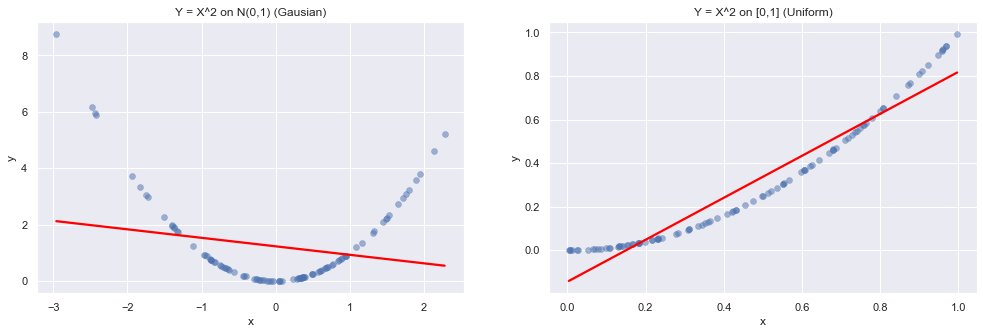

In [299]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

sns.scatterplot(x="x", y="y", data=data1, ax=ax1, edgecolor=None, alpha=0.5)
sns.regplot(x="x", y="y", data=data1, ax=ax1, scatter=False, color="red", ci=None)
ax1.set_title("Y = X^2 on N(0,1) (Gausian)")

sns.scatterplot(x="x", y="y", data=data2, ax=ax2, edgecolor=None, alpha=0.5)
sns.regplot(x="x", y="y", data=data2, ax=ax2, scatter=False, color="red", ci=None)
ax2.set_title("Y = X^2 on [0,1] (Uniform)")

It makes sense that the linear regression lines are different for the two sets of data. This is due to several reasons. 

1. The Gaussian distribution $N(0,1)$ and the uniform distribution on $[0,1]$ are based on different parameters. Our Gaussian distribtion is centered on 0 with unit variance, whereas our unifrom distribution is limited to the interval [0,1]. This difference causes the linear regression y-intercepts to likely be different.
2. The effect of squaring the distribution is different between the Guassian and the uniform. While both squared distributions look like a parabola, in the Guassian distribution, there are many more points closer to the mean and the points are evenly distributed on both sides of the mean. This causes the slope of the regression line to be closer to 0. On the other hand, the squared uniform distribution looks like just the positive-x portion of a parabola. This casues the slope of the regression line to be larger than that of the Gaussian.
3. The squared Gaussian distribution's regression line intercept is likely to be further from 0 than that of the squared uniform distribution. This is indirectly due to the fact of the slope mentioned above.

### Part C

**Please explain how it is possible to have a random variable $Y$ that is positively correlated with $X_1$ but whose cofficient $b_1 < 0$ in a multivariable linear regression model $Y = b_0 + b_1 X_1 + b_2 X_2$. What does this mean about how we interpret a multi-variable model? Can this happen in a single-variable linear regression model as well? Why/why not?**

### Part D

**Please create a dataset that demonstrates your explanation in 1c.**

## Problem 2 - Anscombe"s Quartet

### Part A

**Please load each of the four datasets making Anscombe"s Quartet from the $\texttt{Anscombe\_Quartet.xlsx}$ data file into a Pandas $\texttt{DataFrame}$ with columns labelled by "x" and "y".**

In [300]:
df1 = pd.read_excel("./Anscombe_Quartet.xlsx", sheet_name="Data1")
df2 = pd.read_excel("./Anscombe_Quartet.xlsx", sheet_name="Data2")
df3 = pd.read_excel("./Anscombe_Quartet.xlsx", sheet_name="Data3")
df4 = pd.read_excel("./Anscombe_Quartet.xlsx", sheet_name="Data4")

(2.0, 14.0)

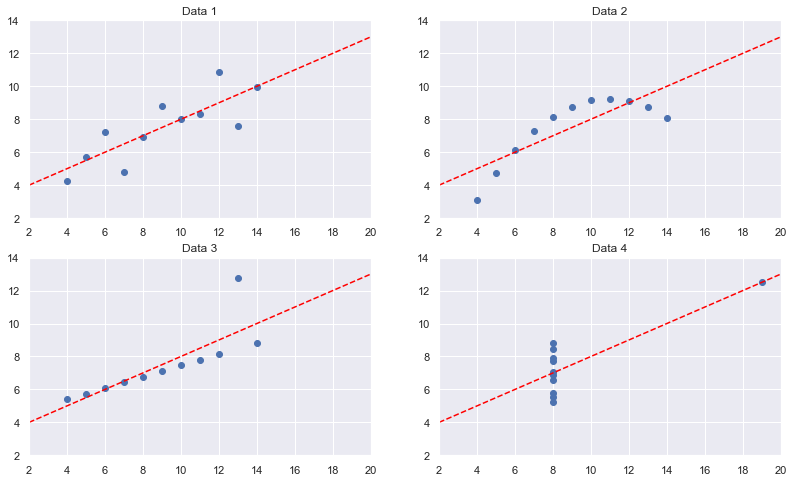

In [321]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))


axs[0][0].scatter(df1["x"], df1["y"])
axs[0][0].axline((0, 3), slope=0.5, color="red", linestyle="--")
axs[0][0].set_title("Data 1")
axs[0][0].set_xlim(2, 20)
axs[0][0].set_ylim(2, 14)

axs[0][1].scatter(df2["x"], df2["y"])
axs[0][1].axline((0, 3), slope=0.5, color="red", linestyle="--")
axs[0][1].set_title("Data 2")
axs[0][1].set_xlim(2, 20)
axs[0][1].set_ylim(2, 14)

axs[1][0].scatter(df3["x"], df3["y"])
axs[1][0].axline((0, 3), slope=0.5, color="red", linestyle="--")
axs[1][0].set_title("Data 3")
axs[1][0].set_xlim(2, 20)
axs[1][0].set_ylim(2, 14)

axs[1][1].scatter(df4["x"], df4["y"])
axs[1][1].axline((0, 3), slope=0.5, color="red", linestyle="--")
axs[1][1].set_title("Data 4")
axs[1][1].set_xlim(2, 20)
axs[1][1].set_ylim(2, 14)

### Part B

**Verify that each of these dataets has the same mean and varince for each of the variables, and also the same linear regression line. To what extent do the means and variances of the columns (x and y) alone determing the regression line?**

In [302]:
print("Data 1 X mean: {:.2f}, variance: {:.2f}".format(df1["x"].mean(), df1["x"].var()))
print("Data 1 Y mean: {:.2f}, variance: {:.2f}\n".format(df1["y"].mean(), df1["y"].var()))
print("Data 2 X mean: {:.2f}, variance: {:.2f}".format(df2["x"].mean(), df2["x"].var()))
print("Data 2 Y mean: {:.2f}, variance: {:.2f}\n".format(df2["y"].mean(), df2["y"].var()))
print("Data 3 X mean: {:.2f}, variance: {:.2f}".format(df3["x"].mean(), df3["x"].var()))
print("Data 3 Y mean: {:.2f}, variance: {:.2f}\n".format(df3["y"].mean(), df3["y"].var()))
print("Data 4 X mean: {:.2f}, variance: {:.2f}".format(df4["x"].mean(), df4["x"].var()))
print("Data 4 Y mean: {:.2f}, variance: {:.2f}\n".format(df4["y"].mean(), df4["y"].var()))

Data 1 X mean: 9.00, variance: 11.00
Data 1 Y mean: 7.50, variance: 4.13

Data 2 X mean: 9.00, variance: 11.00
Data 2 Y mean: 7.50, variance: 4.13

Data 3 X mean: 9.00, variance: 11.00
Data 3 Y mean: 7.50, variance: 4.12

Data 4 X mean: 9.00, variance: 11.00
Data 4 Y mean: 7.50, variance: 4.12



In [303]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

reg.fit(df1[["x"]], df1["y"])
print("Data 1 regression line: y = {0:.2f} + {1:.2f}x".format(reg.intercept_, reg.coef_[0]))

reg.fit(df2[["x"]], df2["y"])
print("Data 2 regression line: y = {0:.2f} + {1:.2f}x".format(reg.intercept_, reg.coef_[0]))

reg.fit(df3[["x"]], df3["y"])
print("Data 3 regression line: y = {0:.2f} + {1:.2f}x".format(reg.intercept_, reg.coef_[0]))

reg.fit(df4[["x"]], df4["y"])
print("Data 4 regression line: y = {0:.2f} + {1:.2f}x".format(reg.intercept_, reg.coef_[0]))

Data 1 regression line: y = 3.00 + 0.50x
Data 2 regression line: y = 3.00 + 0.50x
Data 3 regression line: y = 3.00 + 0.50x
Data 4 regression line: y = 3.00 + 0.50x


It is clear that all 4 datasets share the same regression line to 2 decimal places. Additionally, the X mean and variance, and the Y mean are the same to 2 decimal places, while the Y variance is the same to 1 decimal place.

### Part C

**Please use your skills as a data scientist to give what you feel is the best model for explaining the variable y in terms of x for each of these four datasets, being sure to carefully explain your reasoning!**

1. Dataset 1 is best explained by a linear model. This is because Y seems to have a linear relationship with X with some noise.
2. Dataset 2 is best explanied by a polynomial model of degree 2. This is because Y seems to have a quadratic relationship with X with little noise.
3. Dataset 3 is best explained by a robust linear model, such as OLS backed by the RANSAC algorithm. This is because with the exception of an outlier, Y seems to follow a linear relationship with X with little noise.
4. Dataset 4 seems to be unexplainable with a model. This is because all the data, save for one outlier, is exactly on the line $x=8$ and has a uniformally distributed y value. In this case, Y is likely independent of X. Y could be a categorical variable and the outlier is corrupted data. However, if we still wanted to regress on this data, we might choose to use a robust linear model, like in the third datset where we used OLS + RANSAC.

RMSE plot 1: 1.53
RMSE plot 2: 0.00
RMSE plot 3: 2.45
RMSE plot 4: 1.80


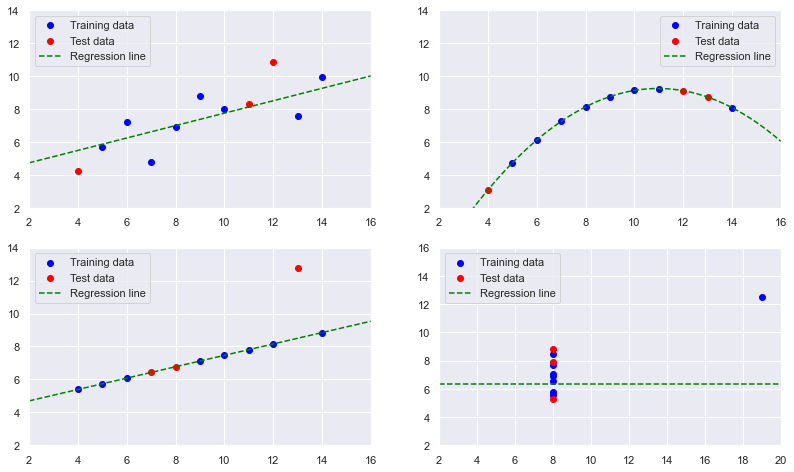

In [383]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import RANSACRegressor

X_train, X_test, y_train, y_test = train_test_split(df1[["x"]], df1["y"], test_size=0.2)
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

print("RMSE plot 1: {:.2f}".format(np.sqrt(mean_squared_error(y_test, y_pred))))

fig, axs = plt.subplots(2, 2, figsize=(12, 8))
axs[0][0].scatter(X_train.values, y_train.values, color="blue", label="Training data")
axs[0][0].scatter(X_test.values, y_test.values, color="red", label="Test data")
axs[0][0].axline((0,reg.intercept_), slope=reg.coef_[0], color="green", linestyle="--", label="Regression line")
axs[0][0].set_xlim(2, 16)
axs[0][0].set_ylim(2, 14)
axs[0][0].legend(loc="best")

### 

X_train, X_test, y_train, y_test = train_test_split(df2[["x"]], df2["y"], test_size=0.2)
reg = LinearRegression()
reg.fit(PolynomialFeatures(2).fit_transform(X_train.values.reshape(-1,1)), y_train)
y_pred = reg.predict(PolynomialFeatures(2).fit_transform(X_test.values.reshape(-1,1)))

print("RMSE plot 2: {:.2f}".format(np.sqrt(mean_squared_error(y_test, y_pred))))

axs[0][1].scatter(X_train.values, y_train.values, color="blue", label="Training data")
axs[0][1].scatter(X_test.values, y_test.values, color="red", label="Test data")
axs[0][1].plot(np.linspace(2, 16, 100),reg.predict(PolynomialFeatures(2).fit_transform(np.linspace(2, 16, 100).reshape(-1,1))), color="green", linestyle="--", label="Regression line")
axs[0][1].set_xlim(2, 16)
axs[0][1].set_ylim(2, 14)
axs[0][1].legend(loc="best")

###

X_train, X_test, y_train, y_test = train_test_split(df3[["x"]], df3["y"], test_size=0.2)
reg = RANSACRegressor(base_estimator=LinearRegression())
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

print("RMSE plot 3: {:.2f}".format(np.sqrt(mean_squared_error(y_test, y_pred))))

axs[1][0].scatter(X_train.values, y_train.values, color="blue", label="Training data")
axs[1][0].scatter(X_test.values, y_test.values, color="red", label="Test data")
axs[1][0].axline((0,reg.estimator_.intercept_), slope=reg.estimator_.coef_[0], color="green", linestyle="--", label="Regression line")
axs[1][0].set_xlim(2, 16)
axs[1][0].set_ylim(2, 14)
axs[1][0].legend(loc="best")

###

X_train, X_test, y_train, y_test = train_test_split(df4[["x"]], df4["y"], test_size=0.2)
reg = RANSACRegressor(base_estimator=LinearRegression())
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

print("RMSE plot 4: {:.2f}".format(np.sqrt(mean_squared_error(y_test, y_pred))))

axs[1][1].scatter(X_train.values, y_train.values, color="blue", label="Training data")
axs[1][1].scatter(X_test.values, y_test.values, color="red", label="Test data")
axs[1][1].axline((0,reg.estimator_.intercept_), slope=reg.estimator_.coef_[0], color="green", linestyle="--", label="Regression line")
axs[1][1].set_xlim(2, 20)
axs[1][1].set_ylim(2, 16)
axs[1][1].legend(loc="best")

## Problem 3 - Diabetes Dataset

### Part A

**Please load the scikit-learn diabetes dataset (e.g. with the Python $\texttt{sklearn.datasets.load\_diabetes()}$ command) into a Pandas $\texttt{DataFrame}$ that includes all features as labeled columns (e.g. series), as well as the (labeled) disease progression measure in the last column.**

In [304]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()

df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df["target"] = diabetes.target
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


### Part B

**Please determine what you feel is the best single variable linear model (i.e. using only one feature) to explain disease progression in terms of the data features, being sure to carefully explain your reasoning!**

<AxesSubplot:>

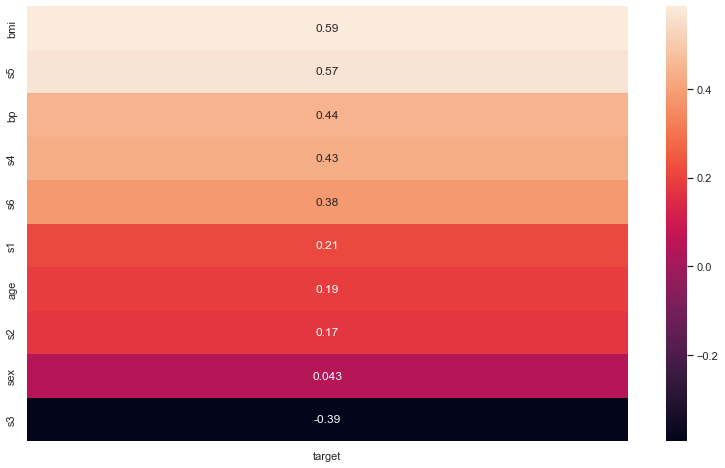

In [305]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr()[["target"]].sort_values(by="target", ascending=False).drop("target"), annot=True)

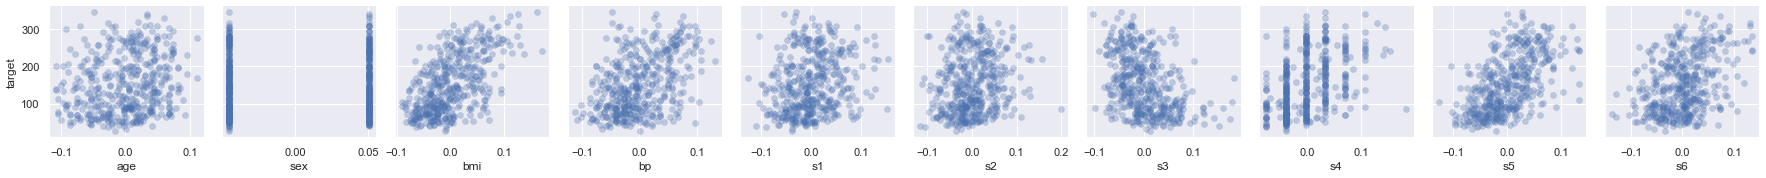

In [306]:
sns.pairplot(df, x_vars=["age", "sex", "bmi", "bp", "s1", "s2", "s3", "s4", "s5", "s6"], y_vars="target", plot_kws={
  "edgecolor": None,
  "alpha": 0.3,
})

When looking at both the correlation heatmap and pairplot, it is clear that the most correlated feature is the BMI, with a correlation coefficient of 0.59, followed closely by the s5 metric at 0.57. All of the variables are continuous, except for sex and the s4 metric. Sex is clearly categorial, with data falling in one of two values (denoting male and female sex). The s4 metric appears to be mostly categorial, since by insepction many data points fall within the same line, although quite a few points appear unrestricted by categories.

For a univariate linear regression, the best feature to use is likely the BMI, since it is the most correlated with the target variable.

In [307]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X = df[["bmi"]]
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

reg = LinearRegression(n_jobs=-1)

reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)


print("MSE: {:.2f}".format(mean_squared_error(y_test, y_pred)))
print("RMSE: {:.2f}".format(np.sqrt(mean_squared_error(y_test, y_pred))))
print("Average percent error: {:.2f}%".format(np.mean(np.abs((y_test - y_pred) / y_test)) * 100))


MSE: 4061.83
RMSE: 63.73
Average percent error: 45.88%


In the below plot, each point is plotted according to its actual value vs predicted value. The red dashed line shows the line on which the points would lie if there was a perfect linear regression.

Text(0.5, 1.0, 'Actual vs. Predicted')

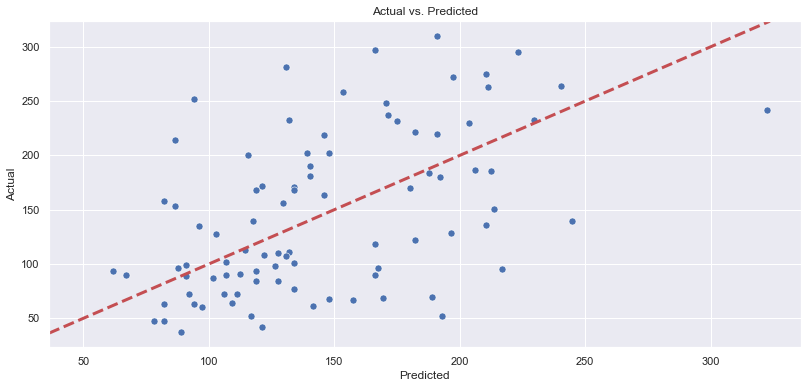

In [308]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.scatterplot(x=y_pred, y=y_test, ax=ax, s=50)
plt.axline((50,50), (300,300), color="r", linestyle="--", linewidth=3)
ax.set_xlabel("Predicted")
ax.set_ylabel("Actual")
ax.set_title("Actual vs. Predicted")

### Part C

**Please determine what you feel is the best multivariable linear model (i.e. using more than one feature) to explain disease progression in terms of the data features, being sure to carefully explain your reasoning!**

Let's first try using all the features except sex. I'm initially choosing to exclude sex because it categorical and has a correlation of just 4%. The next lowest correlated variable is over 4x as correlated than sex.

In [309]:
X = df.drop(["target", "sex"], axis=1)
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

reg = LinearRegression(n_jobs=-1)

reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

print("MSE: {:.2f}".format(mean_squared_error(y_test, y_pred)))
print("RMSE: {:.2f}".format(np.sqrt(mean_squared_error(y_test, y_pred))))
print("Average percent error: {:.2f}%".format(np.mean(np.abs((y_test - y_pred) / y_test)) * 100))

MSE: 2986.72
RMSE: 54.65
Average percent error: 38.87%


We see a decrease of about 9 units in RMSE after using all features except sex. 

In the below plot, each point is plotted according to its actual value vs predicted value. The red dashed line shows the line on which the points would lie if there was a perfect linear regression. The points are slightly closer to the red line in this plot than with the univariate regression performed earlier.

Text(0.5, 1.0, 'Actual vs. Predicted')

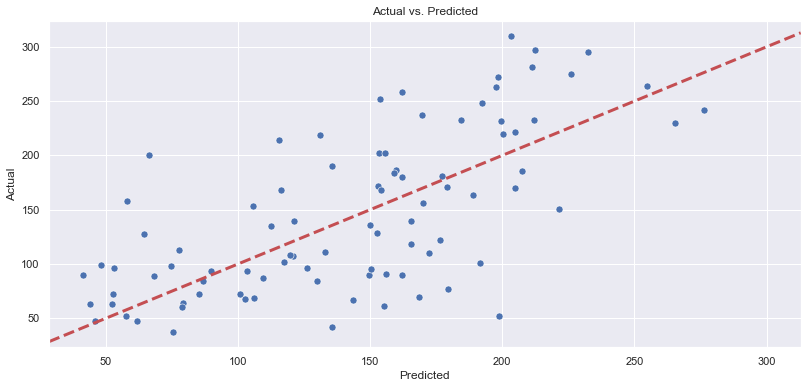

In [310]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.scatterplot(x=y_pred, y=y_test, ax=ax, s=50)
plt.axline((50,50), (300,300), color="r", linestyle="--", linewidth=3)
ax.set_xlabel("Predicted")
ax.set_ylabel("Actual")
ax.set_title("Actual vs. Predicted")